# Cell Counting

Using https://www.researchgate.net/publication/374381260_Automated_Cell_Counting_using_Image_Processing as reference
<hr>
<img src = "process.png">
<hr>

## Aux Functions and Preparations

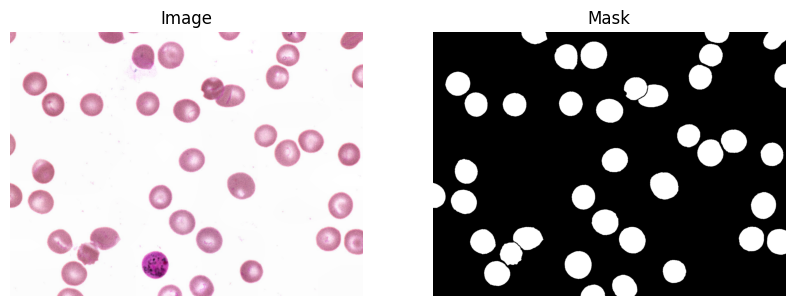

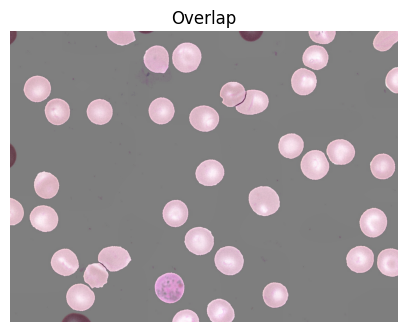

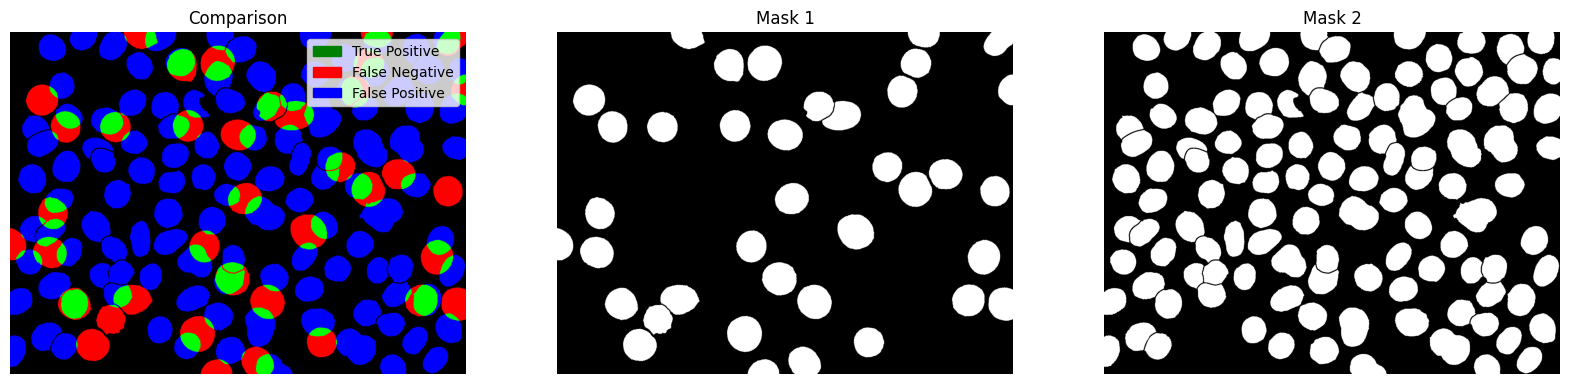

In [92]:

# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cv2
import os


# Variables
img_path = os.path.join("BCCD_Dataset", "original") # Doing to prevent any path issues in different OS
mask_path = os.path.join("BCCD_Dataset", "mask")


images = []
masks = []
for filename in os.listdir(img_path): # Images
    file_path = os.path.join(img_path, filename)
    images.append(cv2.imread(file_path))

for filename in os.listdir(mask_path): # Masks
    file_path = os.path.join(mask_path, filename)
    masks.append(cv2.imread(file_path))


# Functions
def show_img_and_mask(img, mask, title_1 = "Image", title_2 = "Mask"):	
    plt.figure(figsize=(10, 10))

    plt.subplot(1,2,1)
    plt.axis("off")
    plt.imshow(img)
    plt.title(title_1)

    plt.subplot(1,2,2)
    plt.axis("off")
    plt.imshow(mask)
    plt.title(title_2)

def show_img_and_mask_overlap(img, mask, title = "Overlap"):
    plt.figure(figsize=(5, 5))

    plt.axis("off")
    plt.imshow(img)
    plt.imshow(mask, alpha=0.5)
    plt.title(title)

def mask_comparison(mask_1, mask_2):
    new_mask = np.zeros(mask_1.shape)

    # False Positive
    blue = (mask_1[:, :, 0] == 255) & (mask_2[:, :, 0] != 255)
    new_mask[blue, 0] = 255

    # True Positive
    green = (mask_1[:, :, 0] == 255) & (mask_2[:, :, 0] == 255)
    new_mask[green, 1] = 255

    # False Negative
    red = (mask_1[:, :, 0] != 255) & (mask_2[:, :, 0] == 255)
    new_mask[red, 2] = 255

    new_mask[:, : , 0] = blue
    new_mask[:,:, 1] = green
    new_mask[:,:, 2] = red

    green_patch = mpatches.Patch(color='green', label='True Positive')
    red_patch = mpatches.Patch(color='red', label='False Negative')
    blue_patch = mpatches.Patch(color='blue', label='False Positive')

    plt.figure(figsize=(20,20))
    plt.subplot(1,3,1)
    plt.imshow(new_mask)
    plt.axis("off")
    plt.title("Comparison")
    plt.legend(handles=[green_patch, red_patch, blue_patch], loc='upper right')

    plt.subplot(1,3,2)
    plt.imshow(mask_1)
    plt.axis("off")
    plt.title("Mask 1")

    plt.subplot(1,3,3)
    plt.imshow(mask_2)
    plt.axis("off")
    plt.title("Mask 2")

    plt.show()

show_img_and_mask(images[0], masks[0])
show_img_and_mask_overlap(images[0], masks[0])
mask_comparison(masks[0], masks[1])
    




## Image Acquisition

## Image Segmentation

## Object Identification

## Objects Counted